# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
    
    - This paper provides a guideline for how to clean messy datasets in an efficient and effective way.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

    - The tidy data standard intends to ease the exploration process of the data, as well as, facilitate analysis and simplify the tools that are used for such analysis.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

    - The first sentence explains that all datasets are unique in their variables and observations which causes them to have problems that are unique to their dataset, however, datasets are all structured in a similar way.
    - The second sentence alludes to the complexity of gathering real data because often it is tricky to separate variables from observations because the questions you ask may change which is which.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

    - Wickham defines values as numbers or strings that belong to a variable and an observation. A variable, thus, contains all values that measure the same underlying attribute across units. Whereas, an observation contains all values measured on the same unit, but across attributes.

  5. How is "Tidy Data" defined in section 2.3?

    - Wickham defines tidy dta as being comprised of three qualities: 1) each variable forms a column, 2) each observation forms a row, 3) each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

    - The five most common problems with messey data are: 1) column headers are values, not variable names, 2) multiple variables are stored in one column, 3) variables are stored in both rows and columns, 4) multiple types of observational units are stored in the same table, 5) a single observational unit is stored in multiple tables.
    - The data in Table 4 are messy because they have values in the column names.
    - Melting the dataset means that you transform columns into rows which creates two new variables: one that contains repeated column headings and one that contains the data values from the previously separate columns.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

    - Table 11 is messy because the column "element" contains the names of variables not values. Table 12 is considered tidy and molten because because there is now one row for each observation and the column "element" was replaced with two columns "tmax" and "tmin".

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

    - The chicken-and-egg problem with tidy data is that if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data.
    - Wickham hopes the future will bring better tools and strategies to facilitate the data wrangling process like matching similar but not identical values or filling in structural missing values.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
#importing packages
import numpy as np
import pandas as pd

In [ ]:
# 1. Numerical variable: Airbnb
ab = pd.read_csv('./assignment2/data/airbnb_hw.csv')
print(ab.shape, '\n')
print(ab.dtypes, '\n')

var = "Price"
print(ab[var].unique()) # to see if we have any non-numeric characters

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '28

In [ ]:
#removing the commas from values over 999
ab[var] = ab[var].str.replace(',', '')
print(ab[var].unique())

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [ ]:
ab[var] = pd.to_numeric(ab[var], errors="coerce") #coercing the price variable from object to numeric

print(ab.dtypes) #verifying the data type changed

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
dtype: object


In [ ]:
# 2. Categorical variable: For the ./data/sharks.csv data covered in the lecture,
#clean the "Type" variable as well as you can, and explain the choices you make.

sharks = pd.read_csv('./assignment2/data/sharks.csv')
print(sharks.shape)
print(sharks.dtypes, '\n')

var2 = "Type"
print(sharks[var2].unique(), '\n')

(6462, 257)
index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 



<ipython-input-6-a236990c2f93>:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('./assignment2/data/sharks.csv')


In [ ]:
#combining the provided answers of the type to unprovoked, provoked, unknown, and watercraft which are the most general groups
sharks[var2] = sharks[var2].replace(["Questionable", "Unconfirmed", "Unverified", "Invalid", "Under investigation"], "Unknown")
sharks[var2] = sharks[var2].replace(["Boating", "Sea Disaster", "Boat", "Boatomg"], "Watercraft")
sharks[var2].unique()

array(['Unprovoked', 'Provoked', 'Unknown', 'Watercraft', nan],
      dtype=object)

In [ ]:
#3. Dummy variable: For the pretrial data covered in the lecture, clean the
# WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular,
# replace missing values with np.nan.

trial = pd.read_csv("./PretrialData.csv") #downloaded csv onto laptop and had to upload into google colab environment

<ipython-input-38-f09998aa74dd>:5: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

In [ ]:
var3 = "WhetherDefendantWasReleasedPretrial"
print(trial[var3].unique(), '\n') #checking the number of unique values
trial[var3].value_counts()

[9 0 1] 



1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [ ]:
trial[var3] = trial[var3].replace('', np.nan) #replaced the missing values with nans
trial[var3] = trial[var3].replace(9, np.nan) #replaced 9 with nan since 9 is the number to mean missing



In [ ]:
#4. Missing values, not at random: For the pretrial data covered in the lecture,
#clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make.
 #(Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

var4 = "ImposedSentenceAllChargeInContactEvent"
trial[var4].unique() #there is an empty string in the data making every value an object not a numeric

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [ ]:
trial[var4] = trial[var4].replace(' ', np.nan) #changing the empty space string to a nan because we don't know
#if that missing data means the person didn't serve any prison time or if it was unknown at the time of data entry

trial[var4] = pd.to_numeric(trial[var4]) #typecasting from string to numeric
trial[var4].unique().tolist()

[nan,
 60.0,
 12.0,
 0.985626283367556,
 36.0,
 6.0,
 24.0,
 5.91375770020534,
 120.0,
 72.0,
 11.9917864476386,
 0.0,
 2.95687885010267,
 84.0,
 108.0,
 300.0,
 240.0,
 180.0,
 4.0,
 96.0,
 2.0,
 54.0,
 0.328542094455852,
 44.0,
 5.0,
 115.0,
 132.0,
 48.0,
 258.0,
 34.0,
 76.0,
 0.164271047227926,
 0.131416837782341,
 111.0,
 9.0,
 3.0,
 1.97125256673511,
 36.9856262833676,
 0.0657084188911704,
 35.4928131416838,
 106.492813141684,
 8.0,
 35.0,
 18.3141683778234,
 480.0,
 32.0,
 93.0,
 234.0,
 732.0,
 1.16427104722793,
 4.6570841889117,
 21.0,
 7.0,
 4.49281314168378,
 18.0,
 600.0,
 43.1642710472279,
 179.0,
 52.0,
 30.0,
 20.0,
 192.0,
 702.0,
 14.0,
 55.0,
 53.0,
 11.9055441478439,
 114.0,
 35.0061601642711,
 68.0,
 0.657084188911704,
 46.6242299794661,
 102.0,
 65.0,
 200.0,
 57.0,
 24.3285420944559,
 12.1642710472279,
 117.0,
 81.4928131416838,
 22.4928131416838,
 1980.0,
 3.6570841889117,
 56.0,
 10.0,
 2.79260780287474,
 1.0,
 47.0,
 22.0,
 1500.0,
 40.0,
 284.0,
 11.0,
 118.0

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
df = pd.read_csv('./assignment2/data/college_completion.csv')

In [ ]:
df['aid_value'].unique().tolist()

[7142.0,
 6088.0,
 2540.0,
 6647.0,
 7256.0,
 10390.0,
 5057.0,
 4327.0,
 8875.0,
 20385.0,
 4316.0,
 4746.0,
 4920.0,
 4936.0,
 4817.0,
 6697.0,
 4849.0,
 4941.0,
 4815.0,
 4952.0,
 3781.0,
 11447.0,
 3385.0,
 6289.0,
 4363.0,
 3989.0,
 4589.0,
 19910.0,
 4127.0,
 4474.0,
 4822.0,
 9624.0,
 6699.0,
 8727.0,
 7109.0,
 3729.0,
 4620.0,
 4890.0,
 6868.0,
 4750.0,
 4221.0,
 4162.0,
 4061.0,
 13261.0,
 2379.0,
 3626.0,
 5164.0,
 6250.0,
 18715.0,
 5457.0,
 7526.0,
 16234.0,
 3409.0,
 5321.0,
 4792.0,
 4296.0,
 4830.0,
 5315.0,
 4688.0,
 7508.0,
 3310.0,
 2930.0,
 4689.0,
 3736.0,
 4077.0,
 3556.0,
 3651.0,
 4191.0,
 8503.0,
 5138.0,
 10381.0,
 2616.0,
 3603.0,
 4235.0,
 4089.0,
 4717.0,
 10781.0,
 3411.0,
 7117.0,
 4745.0,
 3676.0,
 2822.0,
 3225.0,
 4364.0,
 4519.0,
 6417.0,
 7224.0,
 2982.0,
 3349.0,
 4529.0,
 3573.0,
 5577.0,
 5501.0,
 11847.0,
 4183.0,
 2470.0,
 3242.0,
 3271.0,
 18596.0,
 3808.0,
 5123.0,
 5727.0,
 6619.0,
 9942.0,
 16486.0,
 7137.0,
 7549.0,
 4123.0,
 7744.0,
 6455.0

In [ ]:
import seaborn as sns

<Axes: xlabel='aid_value', ylabel='Density'>

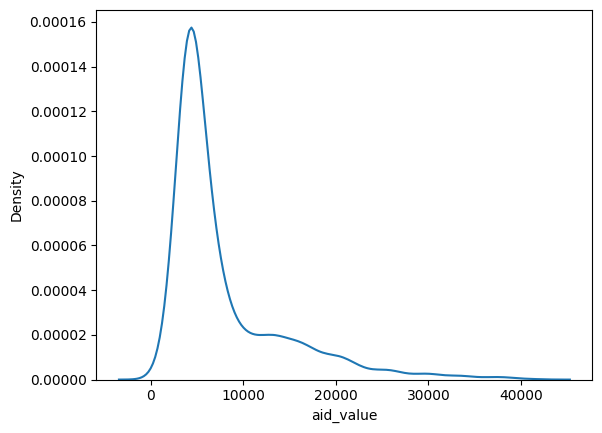

In [ ]:
sns.kdeplot(data=df, x = 'aid_value')

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.